# Exploratory Analysis of ML models

In [194]:
# import libraries
import os
import pandas as pd
import numpy as np

import seaborn as sns # install seaborn with either pip or conda, used for heat maps
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# import DataSet
from util.data_util import DataSet

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, precision_recall_curve, precision_score, precision_recall_fscore_support, plot_confusion_matrix

## load data 

make sure that the file `cleaned_data.zip` is in the `data` directory before starting.

- `ds.load_data()` is used to load the dataset sequentially. if you specify the argument `num_years` then the function will only load that number of years starting from 2001. By default, the function downloads all years (this may take a while). 

- `ds.load_subset()` will load a selected subset of the years, specified by a list of years ex. `['2009, '2010', '2011']`

**NOTE**: using `load_data` on the entire dataset takes a very long time (30 min +), reading in smaller chunks using `load_subset` and then using `pd.concat` may be a better work around

In [ ]:
cleaned_data = 'cleaned_data.zip'
ds = DataSet(cleaned_data)
data = ds.load_subset(['2010'])
df = data.apply(pd.to_numeric, errors = 'ignore')

root_dir = os.getcwd()
com_data = os.path.join(root_dir, 'data', 'Per_Capita_Income.csv')
com_df = pd.read_csv(com_data)
com_df = com_df.apply(pd.to_numeric, errors='ignore')

com_df.fillna(0)
com_df = com_df.rename(columns={'Community Area Number': 'Community Area'})
df = df[df['Community Area'] != 0]
df = df.merge(com_df, how='left', on='Community Area')

df.drop(['Block'], axis=1, inplace=True)
df.drop(['Description'], axis=1, inplace=True)
df.drop(['Location Description'], axis=1, inplace=True)
df.drop(['Updated On'], axis=1, inplace=True)
df.drop(['Location'], axis=1, inplace=True)
df.drop(['COMMUNITY AREA NAME'], axis=1, inplace=True)
df.drop(['Year'], axis=1, inplace=True)

In [216]:
cleaned_data = 'cleaned_data.zip'
ds = DataSet(cleaned_data)
data = ds.load_subset(['2010'])
data.head()

C:\Users\ajshe\Documents\year4\fall-2021\stat451\CrimeAnalysisML\data\cleaned_data.zip
downloading: data/2010/data_2010.csv ...
done.
build DataFrame ...


,Block,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,...,Cluster,Rot30_X,Rot30_Y,Rot45_X,Rot45_Y,Rot60_X,Rot60_Y,Radius,Angle,Type
0,074XX S MARYLAND AVE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,0,0,323,3.0,6.0,69.0,1183191.0,...,3,79.96695363781336,-54.98763900919762,91.47399398922715,-32.41701006534781,96.74723281819763,-7.637215457186642,97.0482051246597,2.696770402159291,9
1,044XX S OAKLEY AVE,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,1,0,924,9.0,12.0,61.0,1161779.0,...,8,80.05189740728876,-55.02859691771544,91.56664405671776,-32.43458730167291,96.84127523471543,-7.630214161711244,97.14140598755756,2.6966223678868926,23
2,029XX W WILCOX ST,FOUND SUSPECT NARCOTICS,SIDEWALK,1,0,1124,11.0,2.0,27.0,1156795.0,...,14,80.11833347372328,-55.01059317423503,91.62615665738804,-32.40000210160035,96.88980868423502,-7.581404429276731,97.18596976924148,2.6960824636997582,18
3,005XX N MICHIGAN AVE,FINANCIAL IDENTITY THEFT OVER $ 300,SMALL RETAIL STORE,0,0,1834,18.0,42.0,8.0,1177342.0,...,15,80.09115004767727,-54.939009655199555,91.58137230608133,-32.33789332019918,96.83047538719954,-7.533002996322729,97.12305132075323,2.6956332872053657,9
4,008XX N AVERS AVE,POSS: HEROIN(WHITE),APARTMENT,1,0,1112,11.0,27.0,23.0,1150571.0,...,1,80.14420622670124,-55.02186149092454,91.65406427265215,-32.404190098489636,96.91784930392454,-7.578226701298767,97.21367719428426,2.696027374003553,18


In [217]:
df = data.apply(pd.to_numeric, errors = 'ignore')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369796 entries, 0 to 369795
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Block                 369796 non-null  object 
 1   Description           369796 non-null  object 
 2   Location Description  369796 non-null  object 
 3   Arrest                369796 non-null  int64  
 4   Domestic              369796 non-null  int64  
 5   Beat                  369796 non-null  int64  
 6   District              369796 non-null  float64
 7   Ward                  369796 non-null  float64
 8   Community Area        369796 non-null  float64
 9   X Coordinate          369796 non-null  float64
 10  Y Coordinate          369796 non-null  float64
 11  Year                  369796 non-null  int64  
 12  Updated On            369796 non-null  object 
 13  Latitude              369796 non-null  float64
 14  Longitude             369796 non-null  float64
 15  

In [219]:
root_dir = os.getcwd()
com_data = os.path.join(root_dir, 'data', 'Per_Capita_Income.csv')
com_df = pd.read_csv(com_data)
com_df = com_df.apply(pd.to_numeric, errors='ignore')

In [220]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Community Area Number                         77 non-null     float64
 1   COMMUNITY AREA NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER CAPITA INCOME                             78 non-null     int64  
 8   HARDSHIP INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [221]:
com_df.fillna(0)
com_df = com_df.rename(columns={'Community Area Number': 'Community Area'})
com_df.head()

,Community Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [222]:
df = df[df['Community Area'] != 0]

In [223]:
df = df.merge(com_df, how='left', on='Community Area')
df.head()

,Block,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,...,Angle,Type,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,074XX S MARYLAND AVE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,0,0,323,3.0,6.0,69.0,1183191.0,...,2.696770,9,Greater Grand Crossing,3.6,29.6,23.0,16.5,41.0,17285,66.0
1,044XX S OAKLEY AVE,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,1,0,924,9.0,12.0,61.0,1161779.0,...,2.696622,23,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
2,029XX W WILCOX ST,FOUND SUSPECT NARCOTICS,SIDEWALK,1,0,1124,11.0,2.0,27.0,1156795.0,...,2.696082,18,East Garfield Park,8.2,42.4,19.6,21.3,43.2,12961,83.0
3,005XX N MICHIGAN AVE,FINANCIAL IDENTITY THEFT OVER $ 300,SMALL RETAIL STORE,0,0,1834,18.0,42.0,8.0,1177342.0,...,2.695633,9,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
4,008XX N AVERS AVE,POSS: HEROIN(WHITE),APARTMENT,1,0,1112,11.0,27.0,23.0,1150571.0,...,2.696027,18,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0


In [224]:
df.drop(['Block'], axis=1, inplace=True)
df.drop(['Description'], axis=1, inplace=True)
df.drop(['Location Description'], axis=1, inplace=True)
df.drop(['Updated On'], axis=1, inplace=True)
df.drop(['Location'], axis=1, inplace=True)
df.drop(['COMMUNITY AREA NAME'], axis=1, inplace=True)
df.drop(['Year'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369793 entries, 0 to 369792
Data columns (total 40 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Arrest                                        369793 non-null  int64  
 1   Domestic                                      369793 non-null  int64  
 2   Beat                                          369793 non-null  int64  
 3   District                                      369793 non-null  float64
 4   Ward                                          369793 non-null  float64
 5   Community Area                                369793 non-null  float64
 6   X Coordinate                                  369793 non-null  float64
 7   Y Coordinate                                  369793 non-null  float64
 8   Latitude                                      369793 non-null  float64
 9   Longitude                                     36

In [225]:
cat_features = ['Community Area', 'dayOfWeek', 'dayOfYear', 'weekOfMonth', 'weekOfYear', 'Season', 'Cluster', 'Beat', 'District', 'Ward']
def one_hot_encode(train_data, categories):
    encoded_df = train_data
    for cat in categories:
        encoded_df = pd.concat([encoded_df, 
                                    pd.get_dummies(pd.Series(encoded_df[cat]), prefix=cat)], axis=1)
    encoded_df = encoded_df.drop(categories, axis=1)
    
    return encoded_df

In [226]:
one_hot = one_hot_encode(df, cat_features)
sample = one_hot.sample(frac=0.5, random_state=123)
bal_data = sample[sample['Arrest'] == 0].sample(frac=0.4, random_state=123)
print(bal_data.shape)
arrest_data = sample[sample['Arrest'] == 1]
print(arrest_data.shape)
all_bal_data = pd.concat([bal_data, arrest_data])
all_bal_data['Arrest'].value_counts()

(53802, 956)
(50392, 956)


0    53802
1    50392
Name: Arrest, dtype: int64

In [227]:
X, y = all_bal_data, all_bal_data['Arrest']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                   stratify=y)

In [228]:
X_train_sub, X_valid, y_train_sub, y_valid = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)
print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 72935 14587 31259


In [229]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (72935, 956)
y_train.shape: (72935,)
X_test.shape: (31259, 956)
y_test.shape: (31259,)


In [230]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sub.values, y_train_sub.values)
print(f"Train Accuracy: {knn.score(X_train_sub.values, y_train_sub.values)*100:0.3f}%")
print(f"Valid Accuracy: {knn.score(X_valid.values, y_valid.values)*100:0.3f}%")

Train Accuracy: 74.191%
Valid Accuracy: 61.239%


In [231]:
y_pred = knn.predict(X_test.values)

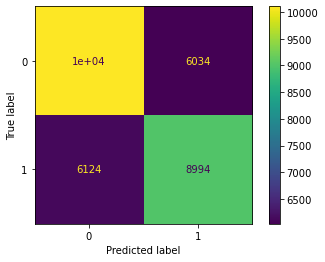

In [232]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [234]:
precision_score(y_test, y_pred)

0.5984828320468459